# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [70]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=['Unknown', 'UNKNOWN', 'unknown'])

In [71]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [72]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row represents a registered animal, possibly a pet, with various details. Two column titles and their meanings are:

`Owner Zip Code`: This column indicates the zip code of the owner's residence, providing information about the geographical location of the animal's home.
`Animal Name`: This column contains the given name of the animal, helping to identify and distinguish individual pets within the dataset.
`Animal Gender`: Indicates the gender of the animal (e.g., Male, Female).
`Primary Breed`: Represents the main or primary breed of the animal.
`Secondary Breed`: If applicable, this column specifies the secondary breed of the animal.
`Animal Dominant Color`: Describes the primary or dominant color of the animal.
`Animal Secondary Colo`r: Indicates the secondary color of the animal.
`Animal Third Color`: Represents a third color of the animal, if available.
`Animal Birth`: Specifies the birth date of the animal.
`Spayed or Neutered`: Indicates whether the animal has been spayed (female) or neutered (male).
`Guard or Trained`: Provides information on whether the animal is trained or serves as a guard.
`Vaccinated`: Indicates whether the animal has been vaccinated.
`Application Date`: Records the date when the owner applied for a license for the animal.
`License Issued Date`: Specifies the date when the license for the animal was issued.
`License Expired Date`: Indicates the expiration date of the animal's license.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

(1) What is the most common breed?

(2) Make a bar chart of the colors.

(3) What's the percentage of vaccinated?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [73]:
df["Primary Breed"].value_counts(ascending=False).head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

<Axes: ylabel='Primary Breed'>

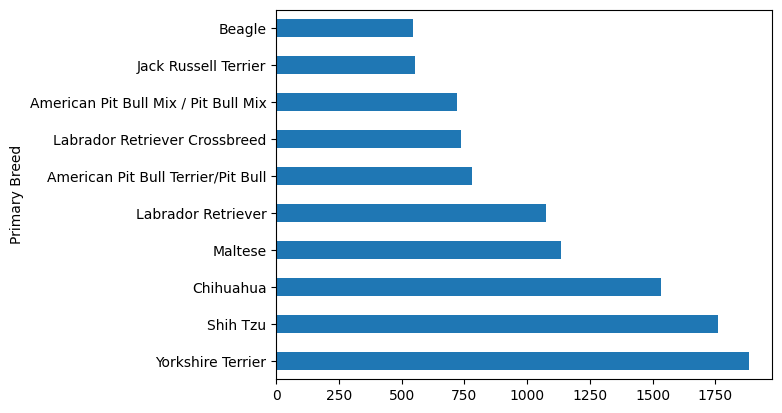

In [74]:
df["Primary Breed"].value_counts(ascending=False).head(10).plot.barh()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: ylabel='Primary Breed'>

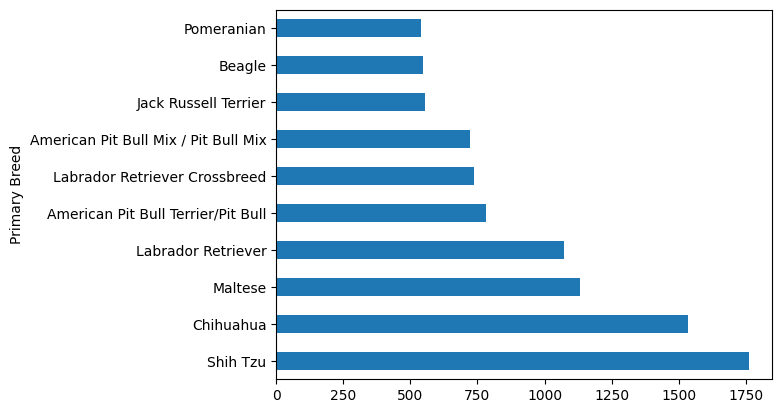

In [75]:
df["Primary Breed"].value_counts(ascending=False).iloc[1:11].plot.barh()
# Now I added na_values and it's not a problem

## What are the most popular dog names?

In [76]:
df["Animal Name"].value_counts(ascending=False).head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [77]:
df[df["Animal Name"] == 'Yuki']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
10713,11217,Yuki,F,Labrador Retriever Crossbreed,NaN,White,Brown,NaN,2014-12-01,Yes,NaN,Yes,2015-06-04 13:10:07.050,2015-06-04,2016-06-04
12358,10308,Yuki,M,Maltese,NaN,WHITE,NaN,NaN,2012-03-01,Yes,No,Yes,2015-06-12 09:52:35.613,2015-06-12,2016-06-25
27320,10461,Yuki,F,"Poodle, Standard",NaN,TAN,NaN,NaN,2005-01-01,Yes,No,Yes,2015-08-13 09:39:27.420,2015-08-13,2016-07-30
27593,10301,Yuki,F,NaN,NaN,White,NaN,NaN,2004-01-01,Yes,No,Yes,2015-08-13 13:13:26.493,2015-08-13,2016-09-08


In [78]:
df[df['Animal Name'].isin(['Max', 'Maxwell'])]['Animal Name'].value_counts()

Animal Name
Max        202
Maxwell     11
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [79]:
df["Guard or Trained"].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [80]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [81]:
df["Guard or Trained"].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [82]:
df["Guard or Trained"] = df["Guard or Trained"].fillna("No")

In [83]:
df["Guard or Trained"].value_counts(dropna=False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [97]:
df[df["Guard or Trained"] == 'Yes']['Primary Breed'].value_counts(ascending=False).head(1)

Primary Breed
German Shepherd Dog    3
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [85]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [86]:
df['age'] = 2015 - df['year']
df['age'].mean()

5.712433333333333

<Axes: >

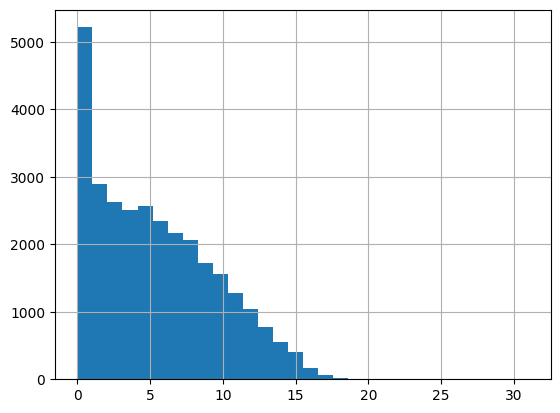

In [87]:
df['age'].hist(bins=30)

# Joining data together

In [88]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,2
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,1
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,7
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,1


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [89]:
nh_df = pd.read_csv("zipcodes-neighborhoods.csv")

In [90]:
nh_df.head(5)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [91]:
merged = df.merge(nh_df, left_on='Owner Zip Code', right_on='zip')

In [92]:
merged.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,7,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,4,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,4,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,8,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [93]:
merged[merged.borough == 'Bronx']["Animal Name"].value_counts(ascending=False).head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [98]:
merged[merged.borough == 'Brooklyn']["Animal Name"].value_counts(ascending=False).head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [95]:
merged[merged.neighborhood == 'Upper East Side']["Animal Name"].value_counts(ascending=False).head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [99]:
dic = {}
for nh in merged.neighborhood.unique():
    dic[nh] = merged[merged.neighborhood == nh]["Primary Breed"].value_counts().idxmax()
dic

{'Upper West Side': 'Labrador Retriever',
 'Southeast Bronx': 'Shih Tzu',
 'Greenwich Village and Soho': 'Labrador Retriever',
 'East Harlem': 'Yorkshire Terrier',
 'Upper East Side': 'Havanese',
 'Sunset Park': 'Yorkshire Terrier',
 'Gramercy Park and Murray Hill': 'Yorkshire Terrier',
 'Southwest Brooklyn': 'Shih Tzu',
 'Northwest Brooklyn': 'Labrador Retriever',
 'South Shore': 'Shih Tzu',
 'Lower East Side': 'Chihuahua',
 'Borough Park': 'Yorkshire Terrier',
 'East New York and New Lots': 'Yorkshire Terrier',
 'Central Brooklyn': 'Shih Tzu',
 'Kingsbridge and Riverdale': 'Shih Tzu',
 'Chelsea and Clinton': 'Chihuahua',
 'Stapleton and St. George': 'Shih Tzu',
 'Northeast Queens': 'Maltese',
 'Canarsie and Flatlands': 'Shih Tzu',
 'Southern Brooklyn': 'Yorkshire Terrier',
 'Northwest Queens': 'Chihuahua',
 'West Central Queens': 'Yorkshire Terrier',
 'Bronx Park and Fordham': 'Yorkshire Terrier',
 'Lower Manhattan': 'Shih Tzu',
 'High Bridge and Morrisania': 'Shih Tzu',
 'Inwood and

## What breed of dogs are the least likely to be spayed? Male or female?

In [163]:
#？
df.groupby(['Primary Breed', 'Animal Gender'])['Spayed or Neut'].value_counts(normalize=True).reset_index(name='proportion').sort_values(by='proportion', ascending=False).head(20)

,Primary Breed,Animal Gender,Spayed or Neut,proportion
0,Affenpinscher,F,No,1.0
253,Curly-Coated Retriever,M,Yes,1.0
225,Collie Crossbreed,M,Yes,1.0
234,"Collie, Rough Coat",F,Yes,1.0
237,"Collie, Smooth Coat",F,Yes,1.0
238,"Collie, Smooth Coat",M,Yes,1.0
239,"Coonhound, Black and Tan",F,Yes,1.0
240,"Coonhound, Black and Tan",M,Yes,1.0
241,"Coonhound, Blue Tick",F,Yes,1.0
242,"Coonhound, Blue Tick",M,Yes,1.0


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [121]:
color_list = ['Black', 'White', 'Grey', 'BLACK', 'WHITE', 'GREY']
df['monochrome'] = (df['Animal Dominant Color'].isin(color_list) &
                    df['Animal Secondary Color'].isin(color_list) &
                    df['Animal Third Color'].isin(color_list))

In [123]:
df['monochrome'].value_counts()

monochrome
False    29931
True        69
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

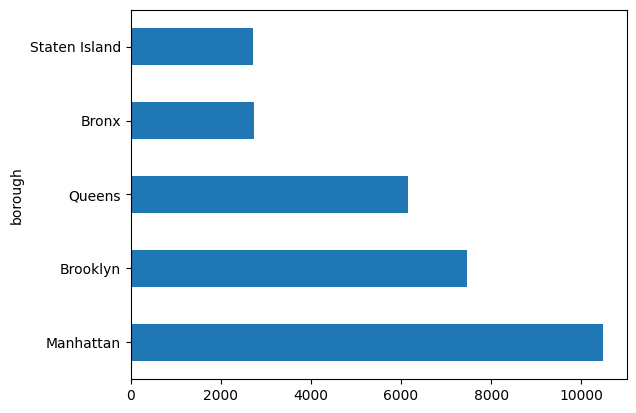

In [119]:
merged['borough'].value_counts().plot.barh()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [125]:
popu_df = pd.read_csv("boro_population.csv")

In [126]:
popu_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [140]:
bo_df = merged.borough.value_counts().to_frame()
bo_df = bo_df.merge(popu_df, left_on='borough', right_on='borough')
bo_df

,borough,count,population,area_sqmi
0,Manhattan,10478,1644518,23
1,Brooklyn,7466,2636735,71
2,Queens,6154,2339150,109
3,Bronx,2748,1455444,42
4,Staten Island,2727,474558,59


In [143]:
bo_df['per-capita'] = bo_df['count'] / bo_df['population']
bo_df.sort_values(by='per-capita', ascending=False).head(1)

,borough,count,population,area_sqmi,per-capita
0,Manhattan,10478,1644518,23,0.006371


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [155]:
merged.groupby('borough')['Primary Breed'].value_counts().groupby('borough', group_keys=False).apply(lambda group: group.nlargest(5))

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

<Axes: ylabel='borough,Primary Breed'>

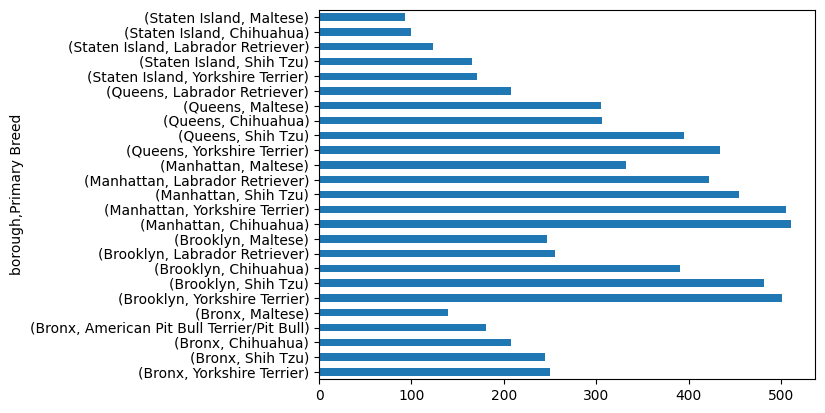

In [156]:
merged.groupby('borough')['Primary Breed'].value_counts().groupby('borough', group_keys=False).apply(lambda group: group.nlargest(5)).plot.barh()

## What percentage of dogs are not guard dogs?

In [164]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999433
Yes    0.000567
Name: proportion, dtype: float64